In [1]:
from pypylon import pylon

In [2]:
camera = pylon.InstantCamera(pylon.TlFactory.GetInstance().CreateFirstDevice())
camera.Open()

In [3]:
# demonstrate some feature accessdi.SetSerialNumber("2134234")
new_width = camera.Width.GetValue() - camera.Width.GetInc()
if new_width >= camera.Width.GetMin():
    camera.Width.SetValue(new_width)

In [4]:
numberOfImagesToGrab = 5
camera.StartGrabbingMax(numberOfImagesToGrab)

In [5]:
while camera.IsGrabbing():
    grabResult = camera.RetrieveResult(5000, pylon.TimeoutHandling_ThrowException)

    if grabResult.GrabSucceeded():
        # Access the image data.
        print("SizeX: ", grabResult.Width)
        print("SizeY: ", grabResult.Height)
        img = grabResult.Array
        print("Gray value of first pixel: ", img[0, 0])

    grabResult.Release()
camera.Close()

SizeX:  1216
SizeY:  1024
Gray value of first pixel:  43
SizeX:  1216
SizeY:  1024
Gray value of first pixel:  43
SizeX:  1216
SizeY:  1024
Gray value of first pixel:  45
SizeX:  1216
SizeY:  1024
Gray value of first pixel:  44
SizeX:  1216
SizeY:  1024
Gray value of first pixel:  45


In [6]:
import matplotlib.pyplot as plt

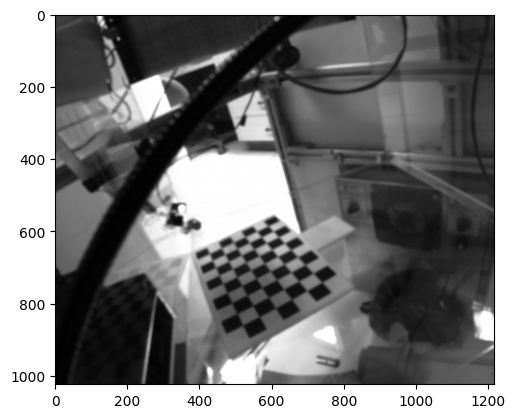

In [7]:
plt.imshow(img, cmap = plt.cm.Greys_r)